In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Workspace - Dump.ipynb
/kaggle/input/.gitignore
/kaggle/input/README.md
/kaggle/input/Hacks/Data Structures in Python.ipynb
/kaggle/input/Hacks/20 Panda Functions for better Analysis.ipynb
/kaggle/input/Hacks/assets/melt_func.png
/kaggle/input/Hacks/assets/melt_output.png
/kaggle/input/Projects/Artifical Neural Networks.ipynb
/kaggle/input/Projects/ML Project End to End - Beginner - 2.ipynb
/kaggle/input/Projects/Extract emailand phone from pdf.ipynb
/kaggle/input/Projects/ML Project End to End - Beginner - 3.ipynb
/kaggle/input/Projects/constellation.ipynb
/kaggle/input/Projects/knn-model-building-from-scratch.ipynb
/kaggle/input/Projects/Pandas Basics.ipynb
/kaggle/input/Projects/random-forest-max-temperature.ipynb
/kaggle/input/Projects/heart-rate-disease-prediction.ipynb
/kaggle/input/Projects/ML Project End to End - Beginner.ipynb
/kaggle/input/Projects/data/testing.docx
/kaggle/input/Projects/data/sonar.all-data.csv
/kaggle/input/Projects/data/housing.csv
/kaggle/in

# Problem Statement - 
### Given dataset contains transactional dataset. Tasks are:
- a)	Exploratory Data Analysis
- b)	Customer Segmentation
- c)	Users profiling based on EDA and Customer Segmentation
- d)	Item recommendation for each users
- e)	Churn Prediction

# Exploratory Data Analysis

In [2]:
# Loading the necessary libraries for EDA
# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from pandas.plotting import scatter_matrix

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/Projects/data/churn_prediction/data.csv', encoding='ISO-8859-1')

In [4]:
# Overview of the dataset
print(df.shape)
df.head(10)

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [5]:
# Describing the data
df.describe(include = 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


We can analyze that there are some outliers/wrong values present in the dataset in the columns - Quantity and UnitPrice

In [6]:
# Taking the info of the dataset about the dtypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Missing Values

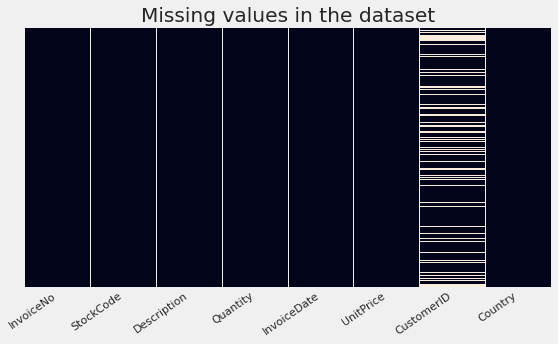

In [7]:
mis_heatmap = sns.heatmap(df.isnull(), cbar = False)
plt.xticks(rotation = 35, fontweight = 'light', horizontalalignment = 'right')
plt.title('Missing values in the dataset')
plt.yticks([])
# mis_heatmap.tick_params(left = False)  // Doubt, how to remove left lables
plt.tight_layout()

In [8]:
# Since there is no customer ID associated with the purchase in the missing values, they are basically useless. 
df = df.dropna()
df = df.reset_index(drop = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.8+ MB


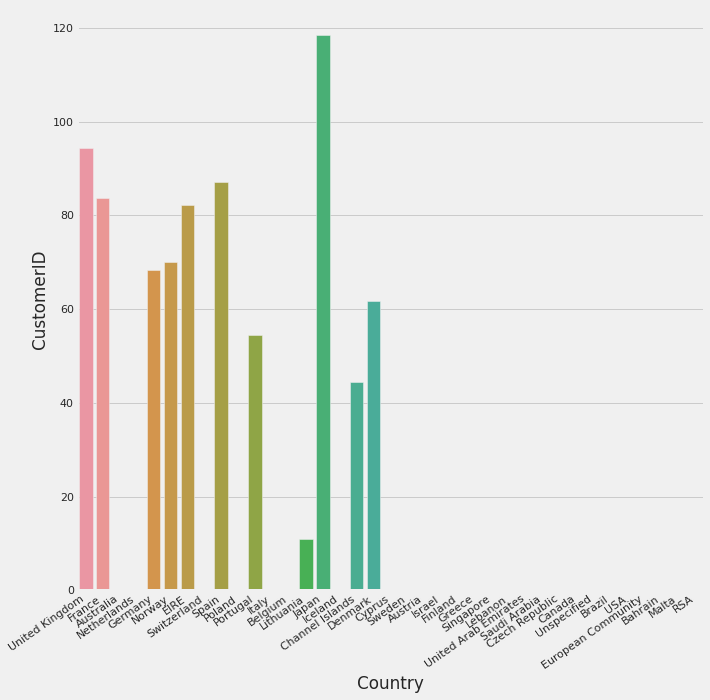

In [10]:
plt.figure(figsize = (10, 10))
sns.barplot(data = df, x = df['Country'], y = df['CustomerID'].value_counts(), ci = None)
ax_bar = plt.subplot(111)
plt.xticks(rotation = 35, fontweight = 'light', horizontalalignment = 'right')
plt.show()

We can say that max number of unique customers are in Japan followed by UK and Spain

### Max number of order done from the country

> Can't plot country with the frequency of orders. **Doubt**

>> Learn Groupby function once

**Done ahead, using group by**

In [11]:
# plt.figure(figsize = (10, 10))
# sns.distplot(df['Country'])
# ax_bar = plt.subplot(111)
# plt.xticks(rotation = 35, fontweight = 'light', horizontalalignment = 'right')
# plt.show()

In [12]:
# Converting the Invoice Date column to date time object
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Checking the max and min date
print(df['InvoiceDate'].max())
print(df['InvoiceDate'].min())

df['InvoiceDate'].max() - df['InvoiceDate'].min()

2011-12-09 12:50:00
2010-12-01 08:26:00


Timedelta('373 days 04:24:00')

The dataset consist of almost an year, The customer segmentation could be -
- Total Number of times shopped in the whole year. After seeing max and min value we can infer the bins.
- Did shopping every month, every 2 months, every 4 months, every 6 months, once in the whole year.
- 

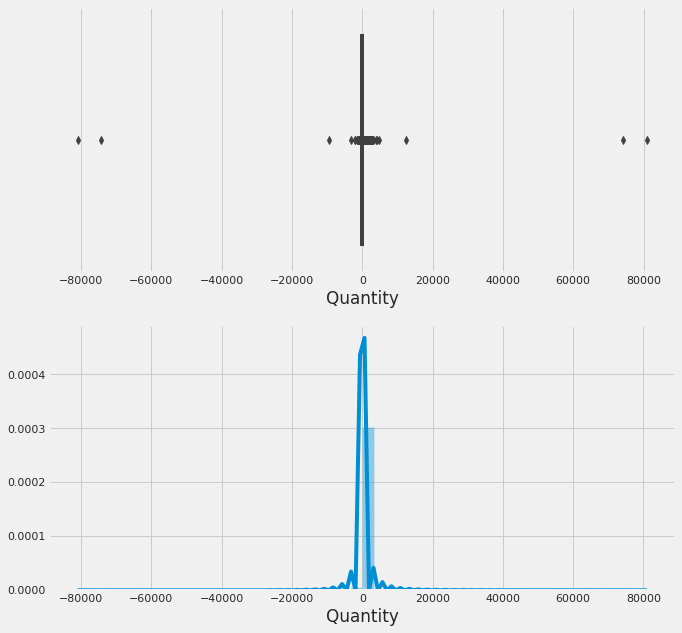

In [13]:
# Visualizing the Quantity 

plt.figure(figsize = (10, 10))

plt.subplot(2, 1, 1)
sns.boxplot(data = df, x = 'Quantity')

plt.subplot(2, 1, 2)
sns.distplot(df['Quantity'])
plt.show()

We can infer that there are some very large outliers that need to be cleaned

In [14]:
df = df[df.Quantity > 0]

In [15]:
df.Quantity.describe()

count    397924.000000
mean         13.021823
std         180.420210
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [16]:
df['amount'] = df['Quantity'] * df['UnitPrice']

## Number of Orders

In [17]:
df.groupby(by = ['CustomerID', 'Country'])['InvoiceNo'].count()

CustomerID  Country       
12346.0     United Kingdom      1
12347.0     Iceland           182
12348.0     Finland            31
12349.0     Italy              73
12350.0     Norway             17
                             ... 
18280.0     United Kingdom     10
18281.0     United Kingdom      7
18282.0     United Kingdom     12
18283.0     United Kingdom    756
18287.0     United Kingdom     70
Name: InvoiceNo, Length: 4347, dtype: int64

In [18]:
df.groupby(by = ['CustomerID', 'Country'])['InvoiceNo'].count().sort_values(ascending = False) # Same customer is buying products in 2 different countries

CustomerID  Country       
17841.0     United Kingdom    7847
14911.0     EIRE              5677
14096.0     United Kingdom    5111
12748.0     United Kingdom    4596
14606.0     United Kingdom    2700
                              ... 
16144.0     United Kingdom       1
13185.0     United Kingdom       1
14705.0     United Kingdom       1
16148.0     United Kingdom       1
12346.0     United Kingdom       1
Name: InvoiceNo, Length: 4347, dtype: int64

In [19]:
df['day'] = df['InvoiceDate'].dt.day
df['month'] = df['InvoiceDate'].dt.month
df['year'] = df['InvoiceDate'].dt.year
df['year_month'] = df['year'].astype(str) + df['month'].astype(str)
df['year_month'] = df['year_month'].astype(int)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,day,month,year,year_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,1,12,2010,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1,12,2010,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010,201012


TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1653, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


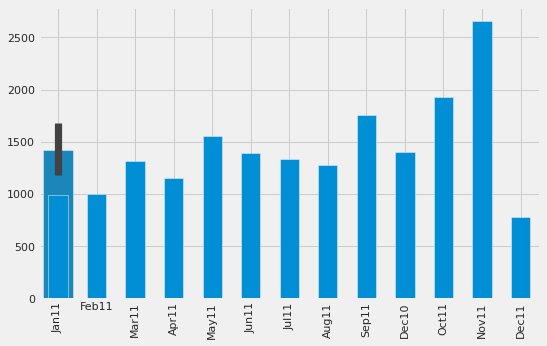

In [20]:
monthly_orders = df.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index()
monthly_orders
sns.barplot(data = monthly_orders)
monthly_orders.plot(kind = 'bar')
ax = plt.subplot(111)
ax.set_xticklabels(('Jan11', 'Feb11', 'Mar11', 'Apr11', 'May11', 'Jun11', 'Jul11', 'Aug11', 'Sep11', 'Dec10', 'Oct11', 'Nov11', 'Dec11'))
plt.show()
# Bug - Dec is getting clubbed from both the years. 
# Above bug fixed, but take some insights about the warnings and how the graph is made.

In [21]:
df.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

In [22]:
## Orders from each country
group_country = df.groupby('Country')['InvoiceNo'].count().sort_values(ascending = False)
group_country.reset_index()
type(group_country)
group_country = pd.DataFrame(group_country)
group_country.head()

,InvoiceNo
Country,
United Kingdom,354345
Germany,9042
France,8342
EIRE,7238
Spain,2485


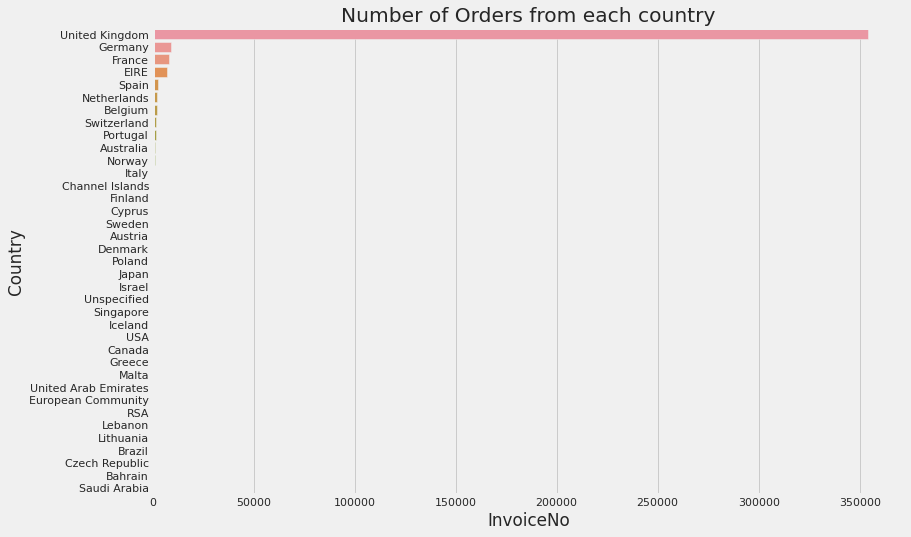

In [23]:
plt.subplots(figsize = (12, 8))
sns.barplot(data = group_country, x = 'InvoiceNo', y = group_country.index)
plt.title('Number of Orders from each country')
plt.show()

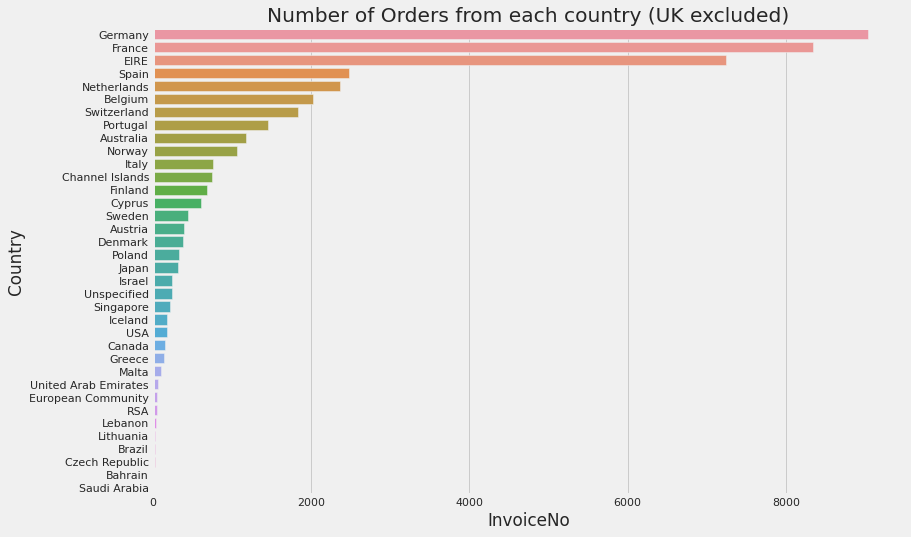

In [24]:
group_country = group_country[group_country.index != 'United Kingdom']
plt.subplots(figsize = (12, 8))
sns.barplot(data = group_country, x = 'InvoiceNo', y = group_country.index)
plt.title('Number of Orders from each country (UK excluded)')
plt.show()

## EDA Left
To analyze the number of unique words, most occuring words, number of orders per day of the week, 

### Checking the duplicates and removing them

In [25]:
print(df.duplicated().sum())

5192


In [26]:
df.drop_duplicates(inplace = True)

In [27]:
df.shape

(392732, 13)

### Researching more into the dataset, we find that Invoice number with 'C' is canceled orders.
It doesn't make much sense to keep them for analysis

In [28]:
df = df[df.InvoiceNo.apply(lambda x: 'C' not in x)]

# Customer Segmentation and User Profiling
We will now group the customers and start making features like Recency, Frequency and Monetary

Useful datas necessary for the feature engineering.

In [31]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,day,month,year,year_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,1,12,2010,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1,12,2010,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010,201012


In [48]:
df_customer = df[['CustomerID', 'InvoiceNo', 'UnitPrice', 'Quantity', 'InvoiceDate', 'amount', 'Country']]
df_customer.head()

,CustomerID,InvoiceNo,UnitPrice,Quantity,InvoiceDate,amount,Country
0,17850.0,536365,2.55,6,2010-12-01 08:26:00,15.30,United Kingdom
1,17850.0,536365,3.39,6,2010-12-01 08:26:00,20.34,United Kingdom
2,17850.0,536365,2.75,8,2010-12-01 08:26:00,22.00,United Kingdom
3,17850.0,536365,3.39,6,2010-12-01 08:26:00,20.34,United Kingdom
4,17850.0,536365,3.39,6,2010-12-01 08:26:00,20.34,United Kingdom


In [36]:
print('Final date: {}'.format(df.InvoiceDate.max()))
print('Initial date: {}'.format(df.InvoiceDate.min()))

Final date: 2011-12-09 12:50:00
Initial date: 2010-12-01 08:26:00


In [37]:
recency_date = df_customer.InvoiceDate.max()
recency_date

Timestamp('2011-12-09 12:50:00')

In [52]:
# New DataFrame to segment the customers
df_customer_grouped = pd.DataFrame(columns = ['Recency', 'Frequency', 'Monetary'])
# Recency
df_new_customer = df_customer.groupby('CustomerID')['InvoiceDate'].max()
df_customer_grouped['Recency'] = (recency_date - df_new_customer).dt.days
# Frequency
df_customer_frequency = df_customer.groupby('CustomerID')['InvoiceNo'].count()
df_customer_grouped['Frequency'] = df_customer_frequency
# Monetary
df_customer_monetary = df_customer.groupby('CustomerID')['amount'].sum()
df_customer_grouped['Monetary'] = df_customer_monetary
# Peeking at the data
df_customer_grouped

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


## Visualize the data now

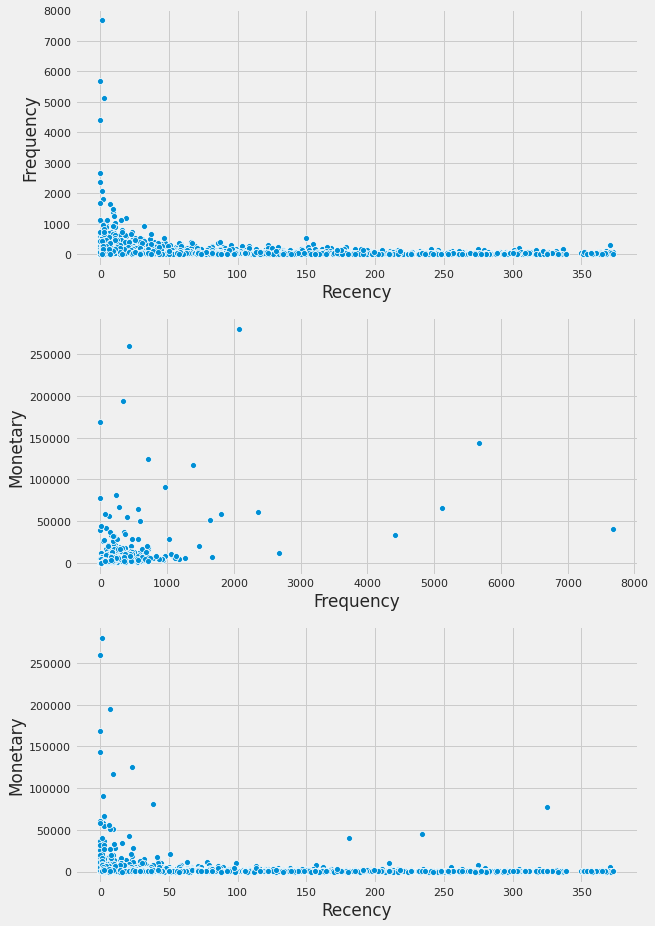

In [63]:
plt.figure(figsize = (9, 15))
plt.subplot(3, 1, 1)
sns.scatterplot(data = df_customer_grouped, x = 'Recency', y = 'Frequency')
plt.subplot(3, 1, 2)
sns.scatterplot(data = df_customer_grouped, x = 'Frequency', y = 'Monetary')
plt.subplot(3, 1, 3)
sns.scatterplot(data = df_customer_grouped, x = 'Recency', y = 'Monetary')

plt.show()

## Evaluate the RFM score of each customers to segment them
Using quartiles to segment them

In [70]:
quart = df_customer_grouped.quantile(q = [0.25, 0.5, 0.75])
quart = quart.to_dict()
quart

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.45500000000004,
  0.5: 668.5600000000002,
  0.75: 1660.315000000001}}

In [71]:
rfm_df = df_customer_grouped

In [72]:
def rscore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def fmscore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [73]:
rfm_df['r_score'] = rfm_df['Recency'].apply(rscore, args = ('Recency', quart))
rfm_df['f_score'] = rfm_df['Frequency'].apply(rscore, args = ('Frequency', quart))
rfm_df['m_score'] = rfm_df['Monetary'].apply(rscore, args = ('Monetary', quart))

rfm_df.head()

,Recency,Frequency,Monetary,r_score,f_score,m_score
CustomerID,,,,,,
12346.0,325,1,77183.60,4,1,4
12347.0,1,182,4310.00,1,4,4
12348.0,74,31,1797.24,3,2,4
12349.0,18,73,1757.55,2,3,4
12350.0,309,17,334.40,4,1,2
